In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
df = pd.read_csv('./CarPrice_Assignment.csv')

In [58]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [59]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [60]:
numeric_feature = [feature for feature in df.columns if df[feature].dtypes!='O']

In [61]:
data = df[numeric_feature]

In [62]:
data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [63]:
print(data.shape)
print(df.shape)

(205, 16)
(205, 26)


In [15]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [64]:
selected_f = [f for f in data.columns if f not in ['car_ID','price']]

In [65]:
selected_f

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [66]:
X = data[selected_f].values

In [67]:
Y = data['price'].values

In [68]:
# Normalize data
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-u)/std

In [71]:
ones = np.ones((X.shape[0],1))
print(X.shape)
X = np.hstack((ones,X))
print(X.shape)

(205, 14)
(205, 15)


In [72]:
split = int(0.80 * X.shape[0])
X_train , Y_train = X[:split,:],Y[:split]
X_test , Y_test = X[split:,:] , Y[split:]

In [73]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,1.0,0.069700,-0.095700,-0.096652,-0.054936,-0.084001,-0.045629,-0.013328,-0.052133,-0.059410,-0.058564,-0.027390,0.015121,0.014015,0.023788
std,0.0,0.896055,1.038455,1.050764,1.067915,1.047529,1.067116,1.086211,1.006504,1.081130,0.922657,1.054621,0.973912,1.054193,1.044170
min,1.0,-1.476452,-2.023713,-2.677244,-2.620512,-2.430664,-2.055348,-1.586561,-2.923049,-3.789311,-0.793101,-1.422573,-2.049347,-1.872388,-2.147310
25%,1.0,-0.671472,-0.708596,-0.710909,-0.938242,-0.892238,-0.978162,-0.719947,-0.952157,-0.592699,-0.414537,-0.864871,-0.683286,-0.953012,-0.837195
50%,1.0,0.133509,-0.408949,-0.150260,-0.237296,-0.010206,-0.309132,-0.407003,0.000903,0.022649,-0.288349,-0.256469,0.052284,-0.033636,0.036215
75%,1.0,0.938490,0.173698,0.341324,0.276731,0.625677,0.556756,0.242957,0.815168,0.494149,-0.187398,0.408971,0.787855,0.885740,0.909625
max,1.0,1.743470,3.686225,2.766741,2.987056,2.492302,2.907988,4.792679,2.258638,2.923575,3.169203,4.661448,1.838671,3.643868,3.384286


In [24]:
# ones = np.ones((X_train.shape[0],1))
# print(X_train.shape)
# X_train = np.hstack((ones,X_train))
# print(X_train.shape)

(164, 14)
(164, 15)


In [99]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    error =0.0
    y_ = hypothesis(X,theta)
    m = X.shape[0]
    error = np.sum((y-y_)**2)
    
    return error/m
def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_-y))
    m = X.shape[0]
    
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_iter=300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iter):
        e = error(X,y,theta)
        error_list.append(e)
        if (i!=0 and error_list[i-1]-error_list[i]<0.001):
            break
        # Gradient Descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [100]:
theta,error_list = gradient_descent(X_train,Y_train)

In [101]:
theta

array([13575.14696397,   883.10545134,  1369.59800317,  -374.34907327,
         340.0329501 ,   478.16372672,   659.37934544,  5034.77699688,
        -140.57478042,  -895.79528127,  1151.41331762,  1700.7715911 ,
        1497.85475719,  -463.46577037,   428.37867487])

In [102]:
error_list

[253299597.22368225,
 174547726.52241576,
 140641245.79985735,
 115580802.42520837,
 95714213.31128971,
 79784062.74064788,
 66946241.56098388,
 56565365.71504943,
 48150061.876440115,
 41314705.73962434,
 35753590.19120322,
 31222639.282272305,
 27526015.650500868,
 24506041.685010225,
 22035453.63052275,
 20011355.083111502,
 18350443.677100863,
 16985212.82067636,
 15860912.510666989,
 14933108.160563018,
 14165714.53625447,
 13529409.380724892,
 13000351.712197168,
 12559145.291878099,
 12189999.765875127,
 11880051.40630507,
 11618812.837037757,
 11397727.077028723,
 11209805.997478494,
 11049337.11606599,
 10911645.733049134,
 10792901.899120636,
 10689963.711159881,
 10600250.05295056,
 10521637.208289672,
 10452374.833658716,
 10391017.63498581,
 10336369.78684216,
 10287439.694021465,
 10243403.15013637,
 10203573.31606199,
 10167376.239272699,
 10134330.876699245,
 10104032.779473135,
 10076140.75655107,
 10050365.962787254,
 10026462.96125894,
 10004222.394174542,
 9983464.9

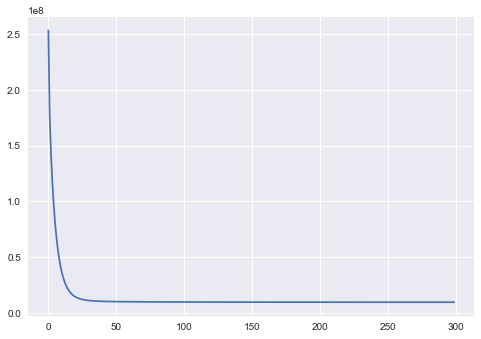

In [103]:
plt.style.use('seaborn')
plt.plot(error_list)
plt.show()

In [104]:
# Predictions
y1 = hypothesis(X_train,theta)

In [105]:
y1

array([13282.03320689, 13282.03320689, 17159.0819003 , 13021.50501198,
       16759.27245854, 16221.24569049, 18158.14117309, 18297.78405566,
       18995.36998531, 16606.33705702, 15182.62514964, 13760.85942983,
       16050.82539386, 16120.64683514, 17845.23969282, 28133.0585945 ,
       27944.04410961, 30420.39811296,   726.85174481,  6896.37821288,
        6141.71736946,  6277.56479979,  6513.68310849,  8254.90269277,
        6589.97279323,  6617.90136974,  6617.90136974,  8295.64691649,
       11536.00312866, 16200.42136591,  2702.08112959,  7554.56536212,
        5838.08536981,  8642.3906076 ,  8662.70229961,  8623.88879292,
        9557.6253302 , 10205.42674742, 10272.70922721, 10208.38800403,
        9865.6921937 , 10960.75278751, 10321.53907022,  6599.34625681,
        6896.37821288,  6229.92717924, 11240.74261325, 32206.26159745,
       32206.26159745, 46795.55006439,  5314.17674023,  5692.36355795,
        5698.7109617 ,  5515.27793817,  5495.61054032,  9023.4000932 ,
      

In [106]:
def r2Score(y,y_):
    num = np.sum((y-y_)**2)
    deno = np.sum((y-y.mean())**2)
    score = (1-num/deno)
    return score*100

In [107]:
# Score
r2Score(y1,y_)

99.99777103479879

In [108]:
y2 = hypothesis(X_test,theta)

In [110]:
r2Score(y2,Y_test)

44.9189504675631

In [111]:
print(y_pred.shape,Y_test.shape)
print(y_.shape,Y_train.shape)

(41,) (41,)
(164,) (164,)
